In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import sys

import os
import numpy as np
import time
from skimage import exposure
import os
import re
import h5py
import copy as cp
import sklearn
from skimage.transform import rotate
from multiprocessing.dummy import Pool 





In [99]:
HDF_File.close()

In [2]:
sys.path.append('/home/yves/Documents/')
import twoptb as MP
HDF_File = h5py.File('/media/yves/Storage 2/Mitt.h5','r',libver='latest')


In [3]:
sessions = HDF_File.keys()
areas = HDF_File[sessions[0]]['registered_data'].keys()
areaFile = HDF_File[sessions[0]]['registered_data'][areas[0]]

In [24]:
def expand_training_set(areaFile):
    ims = []; masks = []
    sz = 20
    training_images = []; training_masks = []
    rotations = np.arange(0,360,120)
    #rotations = [30]
    x_shifts = np.arange(-4,8,4)
    y_shifts = np.arange(-4,6,4)
    for idx,pos in enumerate(areaFile.attrs['ROI_centres']):
        y = pos[0]; x= pos[1]
        if (x-sz>0 and x+sz<512 and y-sz>0 and y+sz<512):
            ims.append(areaFile.attrs['mean_image'][int(x)-sz:int(x)+sz,int(y)-sz:int(y)+sz])
            masks.append(np.pad(areaFile.attrs['ROI_masks'][:,:,idx],[10,10],mode='constant'))

    for mask,im in zip(masks,ims):

        for angle in rotations:

            for x_shift in x_shifts:

                for y_shift in y_shifts:
                    #a = rotate(im,angle=angle,order=5)
                    training_images.append(rotate(im,angle=angle,order=3)[10+x_shift:-10+x_shift,
                                                                  10+y_shift:-10+y_shift].astype('int'))
                    training_masks.append(rotate(mask,angle=angle,order=1)[10+x_shift:-10+x_shift,
                                                                  10+y_shift:-10+y_shift].astype('int'))
                    
                    
    training_set = [(i,j) for i,j in zip(training_images,training_masks)]
    return training_set

In [25]:
training_set = expand_training_set(areaFile)
training_images = [i[0] for i in training_set]
test_images = [i[1] for i in training_set]

In [26]:
training_images[0].shape

(20, 20)

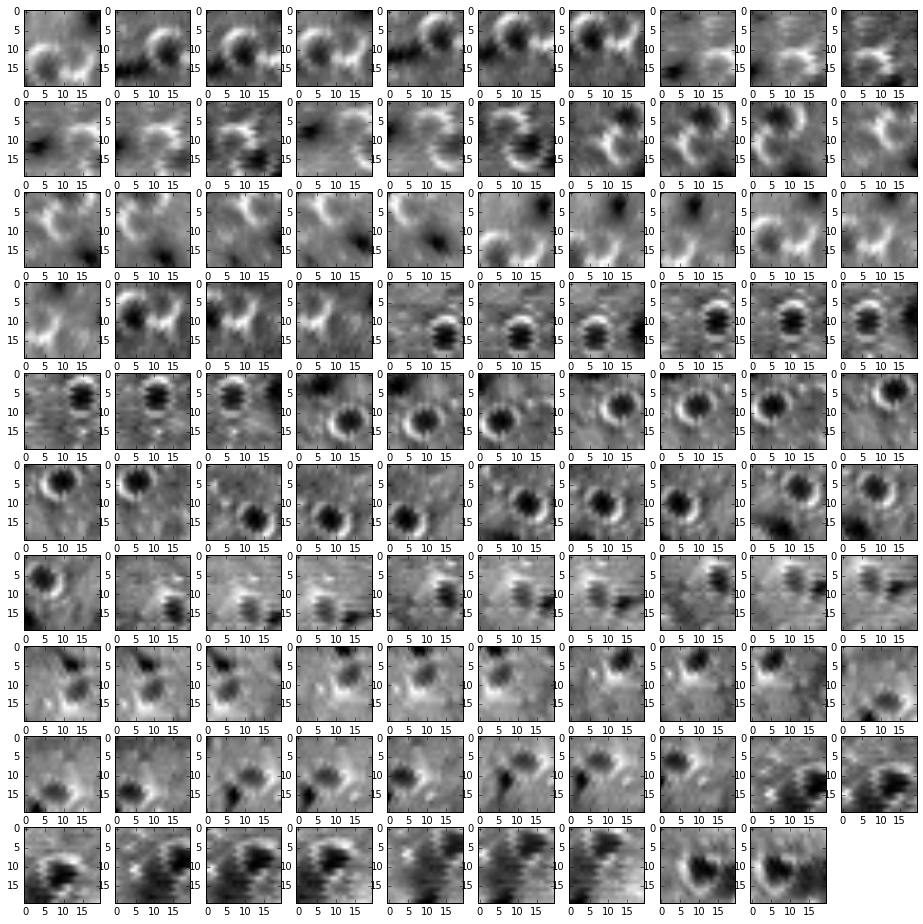

In [27]:
plt.figure(figsize=(16,16))

for i in range(1,100):
    plt.subplot(10,10,i)
    plt.imshow(training_images[i+100],cmap='binary_r')

In [29]:
mask = areaFile.attrs['ROI_masks'][:,:,1]

In [27]:
rotate(ims[1],45)[10:-10,10:-10]

(20, 20)

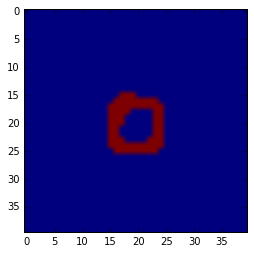

In [34]:
plt.imshow(np.pad(mask,[10,10],mode='constant'))

In [35]:
np.arange(0,360,30)

array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330])